In [123]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pkg_resources

print(f"requests version: {requests.__version__}")
print(f"pandas version: {pd.__version__}")

def get_package_version(package_name):
    try:
        version = pkg_resources.get_distribution(package_name).version
        return version
    except pkg_resources.DistributionNotFound:
        return None

# Beispiel für matplotlib.pyplot
matplotlib_version = get_package_version("matplotlib")

# Beispiel für seaborn
seaborn_version = get_package_version("seaborn")

print(f"matplotlib version: {matplotlib_version}")
print(f"seaborn version: {seaborn_version}")




requests version: 2.31.0
pandas version: 1.5.3
matplotlib version: 3.7.1
seaborn version: 0.12.2


In [40]:
url = "https://data.cityofnewyork.us/resource/h9gi-nx95.json?$limit=2058622"

# Die GET_URL -Anfrage senden 
response = requests.get(url)

# Prüfen ob Anfrage erfolgreich (Statuscode 200)
if response.status_code == 200:
    # JSON-Daten aus der Antwort extrahieren
    data = response.json()

    # DataFrame erstellen
    df = pd.DataFrame(data)

else:
    # Fehler behandeln, wenn die Anfrage nicht erfolgreich war
    print(f"Fehler bei der Anfrage. Statuscode: {response.status_code}")

In [101]:
df.info()
df.describe()
df.head(10)  # Die ersten 10 Zeilen
df.tail(5)   # Die letzten 5 Zeilen
# Anzahl der Datensätze ausgeben
num_rows, num_columns = df.shape
#print("Anzahl der Zeilen und Spalten:", df.shape)

#print("Spalten im DataFrame:", df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058622 entries, 0 to 2058621
Data columns (total 33 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   ON STREET NAME                 object 
 3   OFF STREET NAME                object 
 4   NUMBER OF PERSONS INJURED      float64
 5   NUMBER OF PERSONS KILLED       float64
 6   NUMBER OF PEDESTRIANS INJURED  int64  
 7   NUMBER OF PEDESTRIANS KILLED   int64  
 8   NUMBER OF CYCLIST INJURED      int64  
 9   NUMBER OF CYCLIST KILLED       int64  
 10  NUMBER OF MOTORIST INJURED     int64  
 11  NUMBER OF MOTORIST KILLED      int64  
 12  CONTRIBUTING FACTOR VEHICLE 1  object 
 13  CONTRIBUTING FACTOR VEHICLE 2  object 
 14  COLLISION ID                   int64  
 15  VEHICLE TYPE CODE1             object 
 16  VEHICLE TYPE CODE2             object 
 17  BOROUGH                        object 
 18  ZI

In [84]:
df.to_csv('nyc_crash_data.csv', index=False)
df = pd.read_csv('nyc_crash_data.csv')
df.columns = df.columns.str.replace('_', ' ').str.upper()

# Die ersten 100 Zeilen mit Header ausgeben
df.head(100)

C:\Users\vikto\AppData\Local\Temp\ipykernel_12488\4236668863.py:2: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('nyc_crash_data.csv')


,CRASH DATE,CRASH TIME,ON STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,...,CONTRIBUTING FACTOR VEHICLE 3,VEHICLE TYPE CODE 3,CONTRIBUTING FACTOR VEHICLE 4,VEHICLE TYPE CODE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 5,MONTH,YEAR,COLLISION ID.1,COLLISION ID
0,2021-09-11,2:39,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,September,2021,1,1
1,2022-03-26,11:45,QUEENSBORO BRIDGE UPPER,NaN,1.0,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,March,2022,2,2
2,2022-06-29,6:55,THROGS NECK BRIDGE,NaN,0.0,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,June,2022,3,3
3,2021-09-11,9:35,NaN,NaN,0.0,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,September,2021,4,4
4,2021-12-14,8:13,SARATOGA AVENUE,DECATUR STREET,0.0,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,December,2021,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022-03-26,1:02,WEST 101 STREET,BROADWAY,1.0,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,March,2022,96,96
96,2022-03-26,16:02,QUEENS BOULEVARD,57 AVENUE,1.0,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,March,2022,97,97
97,2022-03-26,16:05,115 AVENUE,221 STREET,1.0,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,March,2022,98,98
98,2022-03-21,12:05,NaN,NaN,1.0,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,March,2022,99,99


In [69]:
# Gesamtsumme der Spalte "Number of persons injured" berechnen
total_injured = df['NUMBER OF PERSONS INJURED'].sum()
total_death =df['NUMBER OF PERSONS KILLED'].sum()
# Gesamtsumme Verletzten
print("Gesamtsumme der Personenverletzungen:", total_injured)

# Gesamtsumme Tote
print("Gesamtsumme der getöteten Personen:", total_death)

Gesamtsumme der Personenverletzungen: 633573.0
Gesamtsumme der getöteten Personen: 3049.0


In [70]:
# 'CRASH DATE' in ein datetime-Objekt umwandeln
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

    Monat  Summe der Unfälle pro Jahr
0    2012                      100545
1    2013                      203742
2    2014                      206033
3    2015                      217694
4    2016                      229831
5    2017                      231007
6    2018                      231564
7    2019                      211486
8    2020                      112915
9    2021                      110549
10   2022                      103882
11   2023                       96487
12   2024                        2887


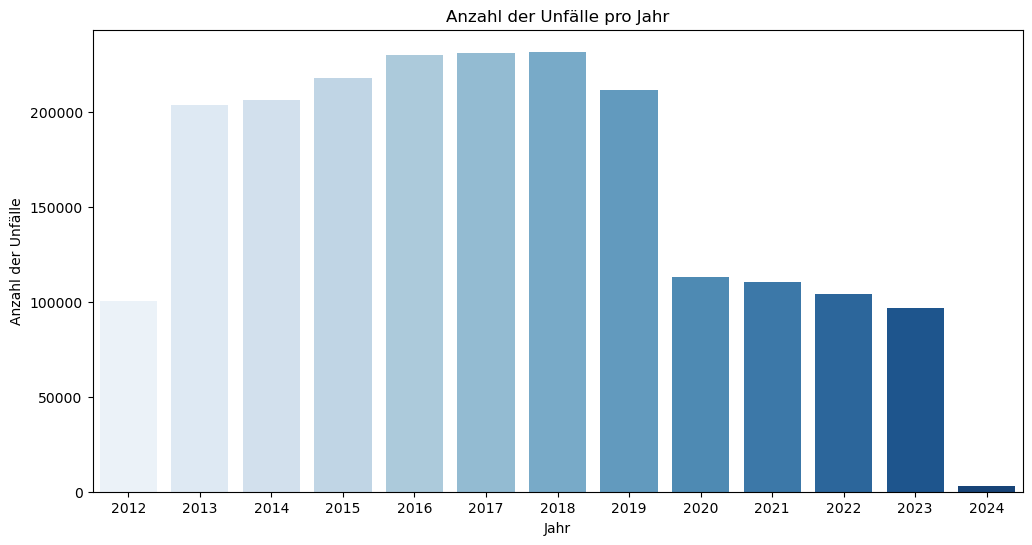

In [76]:
# Jahr rausholen
df['YEAR'] = df['CRASH DATE'].dt.year

# Anzahl der Unfälle pro Jahr
yearly_crashes = df['YEAR'].value_counts().sort_index()

colors = sns.color_palette("Blues", len(yearly_crashes))
# Diagramm erstellen
plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_crashes.index, y=yearly_crashes.values,palette=colors)
plt.title('Anzahl der Unfälle pro Jahr')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Unfälle')


# Tabelle erstellen
table_yearlycrashes = pd.DataFrame({
    'Monat': yearly_crashes.index,
    'Summe der Unfälle pro Jahr': yearly_crashes.values
})

# Tabelle anzeigen
print(table_yearlycrashes)


plt.show()

        Monat  Summe der Unfälle im Monat
0     January                      159479
1    February                      144678
2       March                      161840
3       April                      150232
4         May                      172570
5        June                      173757
6        July                      184889
7      August                      182305
8   September                      182405
9     October                      188567
10   November                      178541
11   December                      179359


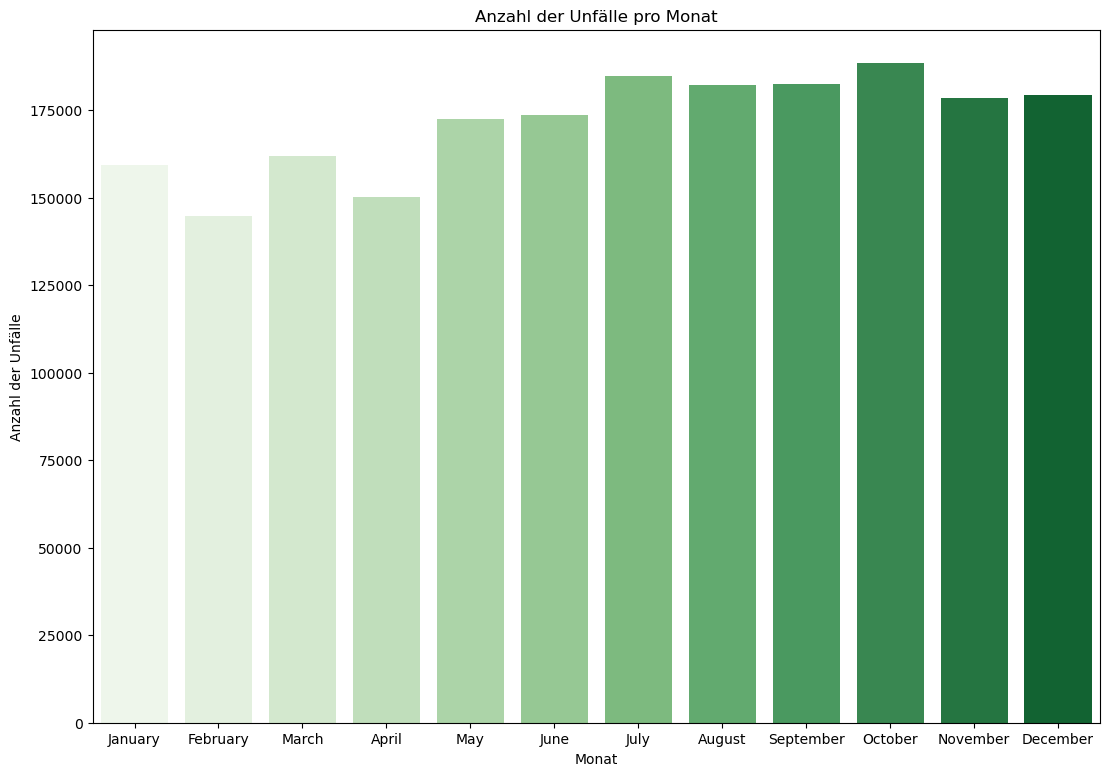

In [75]:
# Monatsinformationen extrahieren
df['MONTH'] = df['CRASH DATE'].dt.month_name()

# Anzahl der Unfälle pro Monat zählen
monthly_crashes = df['MONTH'].value_counts()

# Monate sortieren
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_crashes = monthly_crashes.reindex(months_order)
# Farben definieren
colors = sns.color_palette("Greens", len(yearly_crashes))

# Balkendiagramm erstellen
plt.figure(figsize=(13, 9))
ax = sns.barplot(x=monthly_crashes.index, y=monthly_crashes.values, palette=colors)


    
plt.title('Anzahl der Unfälle pro Monat')
plt.xlabel('Monat')
plt.ylabel('Anzahl der Unfälle')


# DataFrame für die Tabelle erstellen
table_monthlycrashes = pd.DataFrame({
    'Monat': monthly_crashes.index,
    'Summe der Unfälle im Monat': monthly_crashes.values
})

# Tabelle anzeigen
print(table_monthlycrashes)

plt.show()

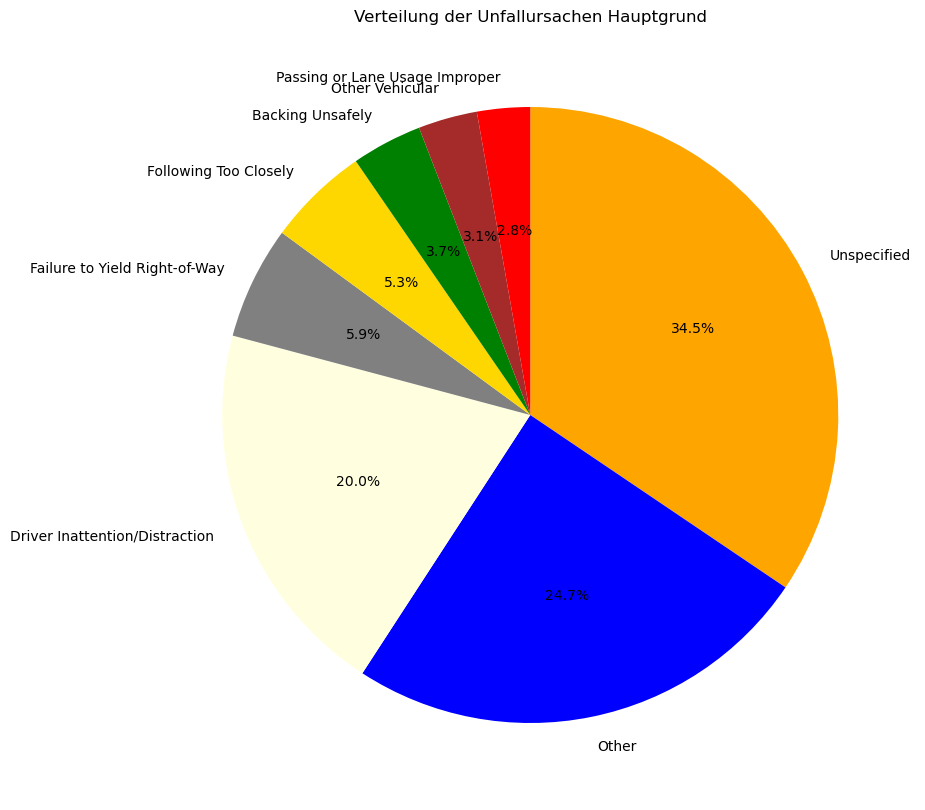

In [94]:
# Leere Zellen in 'CONTRIBUTING FACTOR VEHICLE 1' durch 'Unspecified' ersetzen
df['CONTRIBUTING FACTOR VEHICLE 1'].fillna('Unspecified', inplace=True)

# Top 8 Werte auswählen und den Rest als 'Other' zusammenfassen
top_factors = df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().nlargest(8).index
df['CONTRIBUTING FACTOR VEHICLE 1'] = df['CONTRIBUTING FACTOR VEHICLE 1'].where(df['CONTRIBUTING FACTOR VEHICLE 1'].isin(top_factors), 'Other')

# Daten für die Torte-Grafik vorbereiten
factor_counts = df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

# Farben definieren (Schwarz, Grautöne und Rot)
colors = ['orange', 'blue', 'lightyellow', 'gray', 'gold', 'green', 'brown', 'red']

# Plot erstellen
plt.figure(figsize=(10, 10))
factor_counts.plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False, colors=colors)
plt.title('Verteilung der Unfallursachen Hauptgrund')
plt.ylabel('')  # Keine Beschriftung für die y-Achse (Spalte)
plt.show()